In [1]:
# Carregando meus dados 
# dados = read.csv(file = "../input/winequalitywhite/winequality-white.csv", sep = ';')
dados = read.csv(file = "../input/salary-prediction-classification/salary.csv")

In [2]:
# Verificando meus dados
head(dados)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# Verificando minhas variaveis
str(dados)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : chr  " State-gov" " Self-emp-not-inc" " Private" " Private" ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : chr  " Bachelors" " Bachelors" " HS-grad" " 11th" ...
 $ education.num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital.status: chr  " Never-married" " Married-civ-spouse" " Divorced" " Married-civ-spouse" ...
 $ occupation    : chr  " Adm-clerical" " Exec-managerial" " Handlers-cleaners" " Handlers-cleaners" ...
 $ relationship  : chr  " Not-in-family" " Husband" " Not-in-family" " Husband" ...
 $ race          : chr  " White" " White" " White" " Black" ...
 $ sex           : chr  " Male" " Male" " Male" " Male" ...
 $ capital.gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital.loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours.per.week: int  40 13 40 40 40 40 16 45 50 40 ...
 $ native.countr

In [4]:
# verificando minhas estatisticas da base de dados
summary(dados)

      age         workclass             fnlwgt         education        
 Min.   :17.00   Length:32561       Min.   :  12285   Length:32561      
 1st Qu.:28.00   Class :character   1st Qu.: 117827   Class :character  
 Median :37.00   Mode  :character   Median : 178356   Mode  :character  
 Mean   :38.58                      Mean   : 189778                     
 3rd Qu.:48.00                      3rd Qu.: 237051                     
 Max.   :90.00                      Max.   :1484705                     
 education.num   marital.status      occupation        relationship      
 Min.   : 1.00   Length:32561       Length:32561       Length:32561      
 1st Qu.: 9.00   Class :character   Class :character   Class :character  
 Median :10.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :10.08                                                           
 3rd Qu.:12.00                                                           
 Max.   :16.00                               

In [5]:
# Verificando valores "NA" por colunas
colSums(is.na(dados))

age      workclass         fnlwgt      education  education.num 
             0              0              0              0              0 
marital.status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital.gain   capital.loss hours.per.week native.country         salary 
             0              0              0              0              0

In [6]:
# Importando nossa Biblioteca
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
# Renomeando os nomes das colunas
dados = dados %>% rename(Idade = age, Classe_de_trabalho = workclass,Numero_de_Pessoas_Census = fnlwgt, Educacao = education, Tempo_de_estudo = education.num, 
                      Estado_civil = marital.status, Ocupacao = occupation, Relação_Familia = relationship,
                      Raca = race, Sexo = sex, Ganho_de_Capital = capital.gain, Perda_de_Capital = capital.loss, 
                      horaS_trabalhada_por_semana = hours.per.week, Pais_nativo = native.country, Salario = salary)

In [8]:
# Verificando meus valores com asterisco especial "?"
sum(dados$Classe_de_trabalho == " ?") # 1836
sum(dados$Ocupacao == " ?") # 1843
sum(dados$Pais_nativo== " ?") # 583

[1] 1836

[1] 1843

[1] 583

In [9]:
# Verificando minha classes para verificar um caso de substituião dos valores de caracteres especiais
table(dados$Classe_de_trabalho)
table(dados$Ocupacao)
table(dados$Pais_nativo)


                ?       Federal-gov         Local-gov      Never-worked 
             1836               960              2093                 7 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1298 
      Without-pay 
               14 


                 ?       Adm-clerical       Armed-Forces       Craft-repair 
              1843               3770                  9               4099 
   Exec-managerial    Farming-fishing  Handlers-cleaners  Machine-op-inspct 
              4066                994               1370               2002 
     Other-service    Priv-house-serv     Prof-specialty    Protective-serv 
              3295                149               4140                649 
             Sales       Tech-support   Transport-moving 
              3650                928               1597 


                          ?                    Cambodia 
                        583                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                         13   

In [10]:
# Fazendo nossa Substituição de Valores com o caracter especial   "?" onde peguei as classes
# que tinham menos valores

dados$Classe_de_trabalho = ifelse(dados$Classe_de_trabalho == " ?", " Never-worked ", dados$Classe_de_trabalho)
dados$Ocupacao = ifelse(dados$Ocupacao == " ?", " Armed-Forces", dados$Ocupacao)
dados$Pais_nativo = ifelse(dados$Pais_nativo == " ?", "  Holand-Netherlands", dados$Pais_nativo)

In [11]:
# Verificando minha classes para verficar os valores 
table(dados$Classe_de_trabalho)
table(dados$Ocupacao)
table(dados$Pais_nativo)


      Federal-gov         Local-gov      Never-worked     Never-worked  
              960              2093                 7              1836 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1298 
      Without-pay 
               14 


      Adm-clerical       Armed-Forces       Craft-repair    Exec-managerial 
              3770               1852               4099               4066 
   Farming-fishing  Handlers-cleaners  Machine-op-inspct      Other-service 
               994               1370               2002               3295 
   Priv-house-serv     Prof-specialty    Protective-serv              Sales 
               149               4140                649               3650 
      Tech-support   Transport-moving 
               928               1597 


         Holand-Netherlands                    Cambodia 
                        583                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                         13   

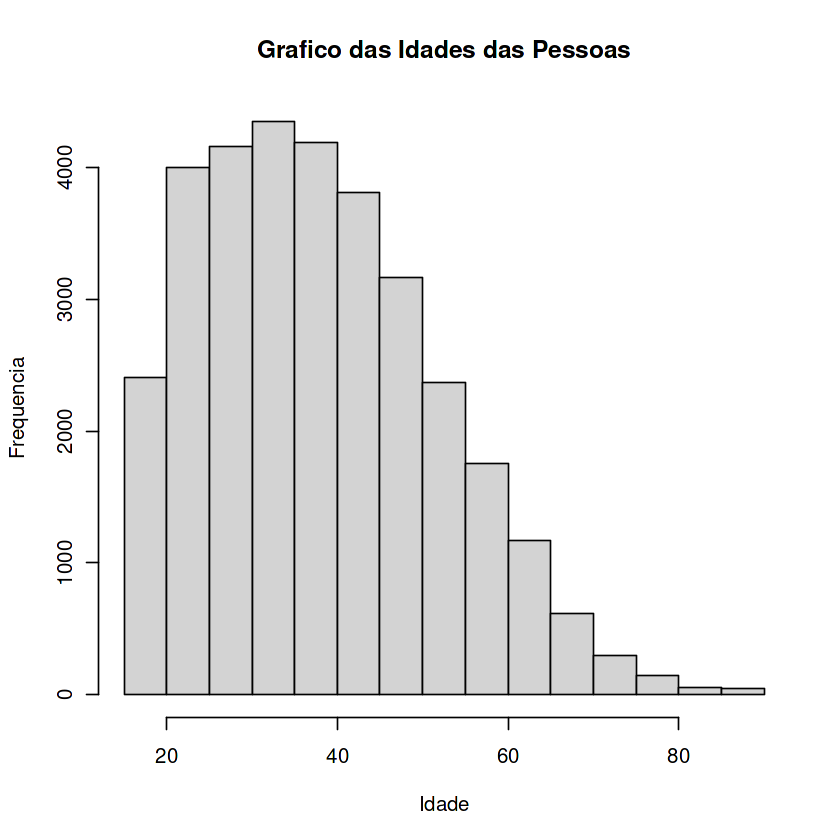

In [12]:
# Gerando meu grafico barras para verificarmos as idades , podemos verificar que as idades
# estão entre 29 a 49 anos com maior frequencia
hist(dados$Idade, xlab = 'Idade', ylab = "Frequencia", 
     main = "Grafico das Idades das Pessoas")


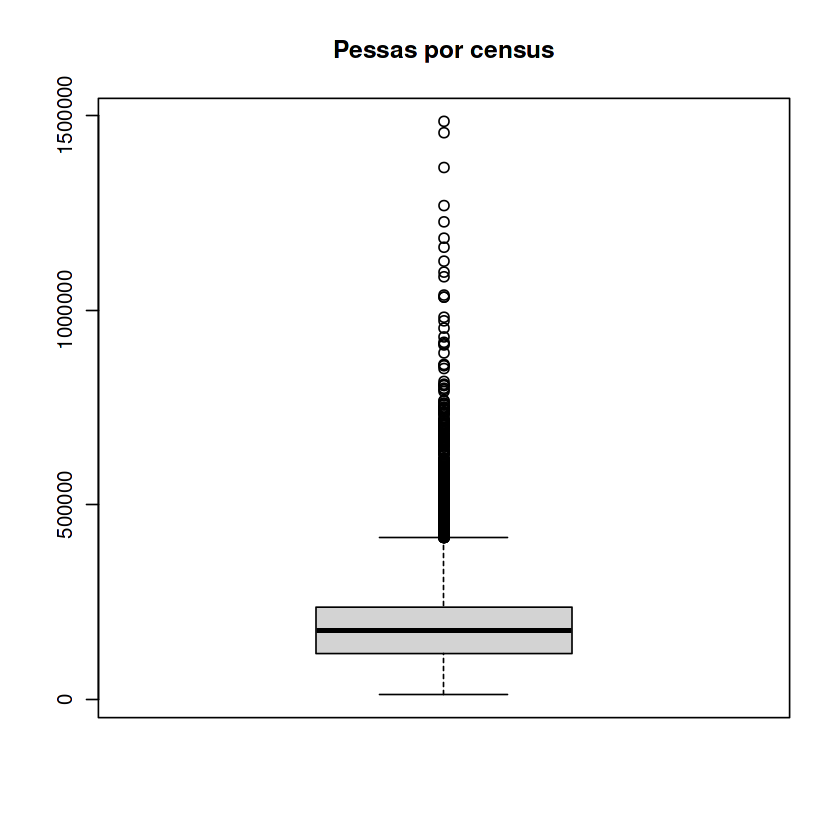

In [13]:
# Gerando meu boxplot para numero de pessoas census
boxplot(x = dados$Numero_de_Pessoas_Census, main = "Pessas por census")

In [14]:
# Verifciancdo 2 variaveis ganho_de_capital, Perda_de_Capital, pois consta muito
# valores zero
table(dados$Ganho_de_Capital)
table(dados$Perda_de_Capital)


    0   114   401   594   914   991  1055  1086  1111  1151  1173  1409  1424 
29849     6     2    34     8     5    25     4     1     8     3     7     3 
 1455  1471  1506  1639  1797  1831  1848  2009  2036  2050  2062  2105  2174 
    1     7    15     1     7     7     6     3     4     5     2     9    48 
 2176  2202  2228  2290  2329  2346  2354  2387  2407  2414  2463  2538  2580 
   23    16     5     5     6     6    11     1    19     8    11     1    12 
 2597  2635  2653  2829  2885  2907  2936  2961  2964  2977  2993  3103  3137 
   20    11     5    31    24    11     3     3     9     8     2    97    37 
 3273  3325  3411  3418  3432  3456  3464  3471  3674  3781  3818  3887  3908 
    6    53    24     5     4     2    23     8    14    12     7     6    32 
 3942  4064  4101  4386  4416  4508  4650  4687  4787  4865  4931  4934  5013 
   14    42    20    70    12    12    41     3    23    17     1     7    69 
 5060  5178  5455  5556  5721  6097  6360  6418  64


    0   155   213   323   419   625   653   810   880   974  1092  1138  1258 
31042     1     4     3     3    12     3     2     6     2     7     2     4 
 1340  1380  1408  1411  1485  1504  1539  1564  1573  1579  1590  1594  1602 
    7     7    21     1    51    18     1    25     6    20    40     8    47 
 1617  1628  1648  1651  1668  1669  1672  1719  1721  1726  1735  1740  1741 
    9    15     2     9     4    24    34    22    18     4     2    42    24 
 1755  1762  1816  1825  1844  1848  1876  1887  1902  1944  1974  1977  1980 
    2    14     2     4     1    51    39   159   202     1    18   168    23 
 2001  2002  2042  2051  2057  2080  2129  2149  2163  2174  2179  2201  2205 
   24    21     9    21     6     1     3     2     1     7    15     1     9 
 2206  2231  2238  2246  2258  2267  2282  2339  2352  2377  2392  2415  2444 
    6     3     2     6    25     3     1    17     2    20     9    49    12 
 2457  2467  2472  2489  2547  2559  2603  2754  28

In [15]:
# Transformando minhas variaveis em Factor 
dados$Classe_de_trabalho = as.factor(dados$Classe_de_trabalho)
dados$Educacao = as.factor(dados$Educacao)
dados$Estado_civil = as.factor(dados$Estado_civil)
dados$Ocupacao = as.factor(dados$Ocupacao)
dados$Relação_Familia = as.factor(dados$Relação_Familia)
dados$Raca = as.factor(dados$Raca)
dados$Sexo = as.factor(dados$Sexo)
dados$Pais_nativo = as.factor(dados$Pais_nativo)

In [16]:
# Verificando meus dados
str(dados)
table(dados$Salario)

'data.frame':	32561 obs. of  15 variables:
 $ Idade                      : int  39 50 38 53 28 37 49 52 31 42 ...
 $ Classe_de_trabalho         : Factor w/ 9 levels " Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ Numero_de_Pessoas_Census   : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ Educacao                   : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ Tempo_de_estudo            : int  13 13 9 7 13 14 5 9 14 13 ...
 $ Estado_civil               : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ Ocupacao                   : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ Relação_Familia            : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ Raca                       : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ Sexo                       : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 


 <=50K   >50K 
 24720   7841 

In [17]:
# Transformando nossa variabel Classe "Salario" para valor numerico 
dados$Salario = ifelse(dados$Salario ==  " <=50K", 0, 1)
table(dados$Salario)


    0     1 
24720  7841 

In [18]:
# Divindo nossa base de dados entre treinamento e teste
dados_treinamento = dados[1:17561, ]
dados_teste = dados[17562:32561, ]

In [19]:
# Algoritmo Naive-Bayes
library(e1071)

In [20]:
# Criando meu modelo
modelo_naive_bayes = naiveBayes(Salario ~., data = dados_treinamento)
modelo_naive_bayes



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.7612892 0.2387108 

Conditional probabilities:
   Idade
Y       [,1]     [,2]
  0 36.77919 14.03935
  1 44.14528 10.41996

   Classe_de_trabalho
Y    Federal-gov    Local-gov  Never-worked  Never-worked       Private
  0 0.0248335702 0.0578951305  0.0002243997   0.0660483207 0.7187523375
  1 0.0462786260 0.0777671756  0.0000000000   0.0236164122 0.6323950382
   Classe_de_trabalho
Y    Self-emp-inc  Self-emp-not-inc    State-gov  Without-pay
  0  0.0198967761      0.0736779116 0.0382975540 0.0003739996
  1  0.0791984733      0.0942270992 0.0465171756 0.0000000000

   Numero_de_Pessoas_Census
Y       [,1]     [,2]
  0 190959.5 106958.6
  1 187753.2 100122.6

   Educacao
Y           10th         11th         12th      1st-4th      5th-6th
  0 0.0344827586 0.0451791458 0.0137631835 0.0062831925 0.0124167851
  1 0.0083492366 0.007633587

In [21]:
# Criando minhas previsoes
previsoes_naive_bayes = predict(modelo_naive_bayes, newdata = dados_teste[-15])
previsoes_naive_bayes

[1] 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   [37] 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0
   [73] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [109] 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
  [145] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
  [181] 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
  [253] 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0
  [289] 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0
  [397] 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  [433] 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
  [469] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
  [505] 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
  [577] 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0
  [685] 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
  [721] 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  [757] 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  [793] 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
  [829] 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
  [865] 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0
  [901] 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
  [937] 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
  [973] 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 [1045] 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 [1081] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0
 [1117] 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0
 [1261] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 [1297] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 [1333] 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 [1405] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 [1441] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 [1477] 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [1513] 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [1549] 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 [1585] 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 [1657] 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [1693] 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 [1729] 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [1765] 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 [18

In [22]:
# Criando nossa Matriz de confusão
matriz_confusao_naive_bayes = table(dados_teste[, 15], previsoes_naive_bayes)
matriz_confusao_naive_bayes


   previsoes_naive_bayes
        0     1
  0 10602   749
  1  1792  1857

In [23]:
# Verifciando nossa Acuracia do Modelo
sum(diag(matriz_confusao_naive_bayes)) / sum(matriz_confusao_naive_bayes)

[1] 0.8306

In [24]:
# Importando nossa Biblioteca "caret" para verificarmos melhor a Matriz de confusão e sua acucaria
library(caret)
confusionMatrix(matriz_confusao_naive_bayes)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Confusion Matrix and Statistics

   previsoes_naive_bayes
        0     1
  0 10602   749
  1  1792  1857
                                          
               Accuracy : 0.8306          
                 95% CI : (0.8245, 0.8366)
    No Information Rate : 0.8263          
    P-Value [Acc > NIR] : 0.08193         
                                          
                  Kappa : 0.4905          
                                          
 Mcnemar's Test P-Value : < 2e-16         
                                          
            Sensitivity : 0.8554          
            Specificity : 0.7126          
         Pos Pred Value : 0.9340          
         Neg Pred Value : 0.5089          
             Prevalence : 0.8263          
         Detection Rate : 0.7068          
   Detection Prevalence : 0.7567          
      Balanced Accuracy : 0.7840          
                                          
       'Positive' Class : 0               
                                  

In [25]:
# Algoritimo Arvore de Decisão

# Importando nossa Biblioteca
library(rpart)

In [26]:
# Criando nosso classificador
modelo_arvore_de_decisao = rpart(formula = Salario ~., data = dados_treinamento, method = 'class')
modelo_arvore_de_decisao

n= 17561 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 17561 4192 0 (0.76128922 0.23871078)  
   2) Relação_Familia= Not-in-family, Other-relative, Own-child, Unmarried 9608  632 0 (0.93422148 0.06577852)  
     4) Ganho_de_Capital< 7073.5 9440  472 0 (0.95000000 0.05000000) *
     5) Ganho_de_Capital>=7073.5 168    8 1 (0.04761905 0.95238095) *
   3) Relação_Familia= Husband, Wife 7953 3560 0 (0.55237017 0.44762983)  
     6) Tempo_de_estudo< 12.5 5560 1849 0 (0.66744604 0.33255396)  
      12) Ganho_de_Capital< 5095.5 5291 1587 0 (0.70005670 0.29994330) *
      13) Ganho_de_Capital>=5095.5 269    7 1 (0.02602230 0.97397770) *
     7) Tempo_de_estudo>=12.5 2393  682 1 (0.28499791 0.71500209) *

In [27]:
# Criando minhas previsões
previsoes_arvore_de_decisao = predict(modelo_arvore_de_decisao, newdata = dados_teste[-15], type = 'class')
previsoes_arvore_de_decisao

17562 17563 17564 17565 17566 17567 17568 17569 17570 17571 17572 17573 17574 
    0     0     1     0     0     0     1     0     0     0     0     0     0 
17575 17576 17577 17578 17579 17580 17581 17582 17583 17584 17585 17586 17587 
    0     0     0     0     1     0     0     0     0     0     0     0     0 
17588 17589 17590 17591 17592 17593 17594 17595 17596 17597 17598 17599 17600 
    0     0     0     0     0     0     0     0     0     0     1     0     0 
17601 17602 17603 17604 17605 17606 17607 17608 17609 17610 17611 17612 17613 
    0     0     0     0     0     0     0     0     0     1     0     0     1 
17614 17615 17616 17617 17618 17619 17620 17621 17622 17623 17624 17625 17626 
    0     0     0     0     0     0     0     0     0     1     0     0     0 
17627 17628 17629 17630 17631 17632 17633 17634 17635 17636 17637 17638 17639 
    1     0     0     0     0     0     0     0     0     0     0     0     1 
17640 17641 17642 17643 17644 17645 17646 17647 17648 17649 17650 17651 17652 
    0     0     0     0     0     1     0     1     0     1     0     1     0 
17653 17654 17655 17656 17657 17658 17659 17660 17661 17662 17663 17664 17665 
    1     1     1     0     0     0     0     0     0     0     1     0     1 
17666 17667 17668 17669 17670 17671 17672 17673 17674 17675 17676 17677 17678 
    1     0     0     0     0     0     1     1     0     0     1     0     0 
17679 17680 17681 17682 17683 17684 17685 17686 17687 17688 17689 17690 17691 
    0     0     0     0     0     0     0     1     0     0     0     0     0 
17692 17693 17694 17695 17696 17697 17698 17699 17700 17701 17702 17703 17704 
    0     0     0     0     0     0     0     0     0     0     0     1     0 
17705 17706 17707 17708 17709 17710 17711 17712 17713 17714 17715 17716 17717 
    0     0     0     0     0     1     0     0     0     0     0     0     0 
17718 17719 17720 17721 17722 17723 17724 17725 17726 17727 17728 17729 17730 
    1     0     0     0     0     0     0     0     0     0     0     0     0 
17731 17732 17733 17734 17735 17736 17737 17738 17739 17740 17741 17742 17743 
    0     0     0     1     0     0     1     0     0     0     0     1     0 
17744 17745 17746 17747 17748 17749 17750 17751 17752 17753 17754 17755 17756 
    0     1     1     0     1     0     0     0     0     0     0     1     1 
17757 17758 17759 17760 17761 17762 17763 17764 17765 17766 17767 17768 17769 
    1     1     1     0     1     1     0     0     0     0     0     0     0 
17770 17771 17772 17773 17774 17775 17776 17777 17778 17779 17780 17781 17782 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
17783 17784 17785 17786 17787 17788 17789 17790 17791 17792 17793 17794 17795 
    0     0     0     0     0     1     0     1     1     0     1     0     0 
17796 17797 17798 17799 17800 17801 17802 17803 17804 17805 17806 17807 17808 
    0     0     0     0     1     0     0     0     0     1     0     0     0 
17809 17810 17811 17812 17813 17814 17815 17816 17817 17818 17819 17820 17821 
    0     1     0     0     0     1     0     0     0     0     0     0     0 
17822 17823 17824 17825 17826 17827 17828 17829 17830 17831 17832 17833 17834 
    1     0     1     0     0     0     0     1     0     0     0     0     0 
17835 17836 17837 17838 17839 17840 17841 17842 17843 17844 17845 17846 17847 
    0     0     0     0     0     0     0     0     0     1     0     1     1 
17848 17849 17850 17851 17852 17853 17854 17855 17856 17857 17858 17859 17860 
    0     0     0     0     0     1     0     1     1     0     0     0     0 
17861 17862 17863 17864 17865 17866 17867 17868 17869 17870 17871 17872 17873 
    0     0     0     0     0     0     0     1     0     0     0     1     0 
17874 17875 17876 17877 17878 17879 17880 17881 17882 17883 17884 17885 17886 
    0     0     0     0     0     0     0     0     0     0     0     1     0 
17887 17888 17889 17890 17891 17892 17893 17894 17

In [28]:
# Criando minha matriz de confusão 
matriz_confusao_arovre_de_decisao = table(previsoes_arvore_de_decisao, dados_teste[, 15])
matriz_confusao_arovre_de_decisao

                           
previsoes_arvore_de_decisao     0     1
                          0 10801  1757
                          1   550  1892

In [29]:
# Verificando minha acuracia
sum(diag(matriz_confusao_arovre_de_decisao)) / sum(matriz_confusao_arovre_de_decisao)

[1] 0.8462

In [30]:
# Ultilizando nossa função
confusionMatrix(matriz_confusao_arovre_de_decisao)

Confusion Matrix and Statistics

                           
previsoes_arvore_de_decisao     0     1
                          0 10801  1757
                          1   550  1892
                                          
               Accuracy : 0.8462          
                 95% CI : (0.8403, 0.8519)
    No Information Rate : 0.7567          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5295          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9515          
            Specificity : 0.5185          
         Pos Pred Value : 0.8601          
         Neg Pred Value : 0.7748          
             Prevalence : 0.7567          
         Detection Rate : 0.7201          
   Detection Prevalence : 0.8372          
      Balanced Accuracy : 0.7350          
                                          
  

In [31]:
# Algoritmo Random Forest
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [32]:
# Transformando nossa variavel em factor para podemos ultilizar nosso algortmo
# Randomforest como classificação
dados_treinamento$Salario = factor(dados_treinamento$Salario, levels = c(0, 1))
str(dados_treinamento)

'data.frame':	17561 obs. of  15 variables:
 $ Idade                      : int  39 50 38 53 28 37 49 52 31 42 ...
 $ Classe_de_trabalho         : Factor w/ 9 levels " Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ Numero_de_Pessoas_Census   : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ Educacao                   : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ Tempo_de_estudo            : int  13 13 9 7 13 14 5 9 14 13 ...
 $ Estado_civil               : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ Ocupacao                   : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ Relação_Familia            : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ Raca                       : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ Sexo                       : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 

In [33]:
# Criando nosso modelo RandomForest
modelo_random_forest = randomForest(x = dados_treinamento[-15], y = dados_treinamento$Salario, ntree = 10)
modelo_random_forest


Call:
 randomForest(x = dados_treinamento[-15], y = dados_treinamento$Salario,      ntree = 10) 
               Type of random forest: classification
                     Number of trees: 10
No. of variables tried at each split: 3

        OOB estimate of  error rate: 17.31%
Confusion matrix:
      0    1 class.error
0 11882 1355   0.1023646
1  1653 2490   0.3989862

In [34]:
# Criando minhas Previsões
previsoes_random_forest = predict(modelo_random_forest, newdata = dados_teste[-15])
previsoes_random_forest

17562 17563 17564 17565 17566 17567 17568 17569 17570 17571 17572 17573 17574 
    0     0     1     0     0     0     1     0     0     0     0     0     0 
17575 17576 17577 17578 17579 17580 17581 17582 17583 17584 17585 17586 17587 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
17588 17589 17590 17591 17592 17593 17594 17595 17596 17597 17598 17599 17600 
    0     0     0     0     0     0     0     0     0     0     1     0     0 
17601 17602 17603 17604 17605 17606 17607 17608 17609 17610 17611 17612 17613 
    0     1     0     0     0     0     0     0     0     1     0     0     1 
17614 17615 17616 17617 17618 17619 17620 17621 17622 17623 17624 17625 17626 
    0     0     0     0     0     0     0     0     0     1     0     0     0 
17627 17628 17629 17630 17631 17632 17633 17634 17635 17636 17637 17638 17639 
    1     0     0     0     0     0     0     0     0     0     0     0     1 
17640 17641 17642 17643 17644 17645 17646 17647 17648 17649 17650 17651 17652 
    0     0     0     0     0     1     0     0     0     0     0     0     0 
17653 17654 17655 17656 17657 17658 17659 17660 17661 17662 17663 17664 17665 
    1     1     1     0     1     0     0     0     0     0     1     0     0 
17666 17667 17668 17669 17670 17671 17672 17673 17674 17675 17676 17677 17678 
    1     0     0     1     0     0     1     1     0     0     1     0     0 
17679 17680 17681 17682 17683 17684 17685 17686 17687 17688 17689 17690 17691 
    0     0     0     0     1     0     0     1     0     0     0     1     0 
17692 17693 17694 17695 17696 17697 17698 17699 17700 17701 17702 17703 17704 
    0     0     0     1     0     0     0     0     0     0     0     1     0 
17705 17706 17707 17708 17709 17710 17711 17712 17713 17714 17715 17716 17717 
    0     1     0     0     0     1     0     0     0     0     0     0     0 
17718 17719 17720 17721 17722 17723 17724 17725 17726 17727 17728 17729 17730 
    1     0     0     0     0     0     0     0     0     0     0     0     1 
17731 17732 17733 17734 17735 17736 17737 17738 17739 17740 17741 17742 17743 
    0     0     1     0     1     0     1     0     0     0     1     1     0 
17744 17745 17746 17747 17748 17749 17750 17751 17752 17753 17754 17755 17756 
    0     1     1     0     1     0     0     0     0     0     0     1     1 
17757 17758 17759 17760 17761 17762 17763 17764 17765 17766 17767 17768 17769 
    1     1     1     0     1     0     0     0     1     0     0     0     0 
17770 17771 17772 17773 17774 17775 17776 17777 17778 17779 17780 17781 17782 
    1     0     1     0     0     0     0     0     0     0     0     0     0 
17783 17784 17785 17786 17787 17788 17789 17790 17791 17792 17793 17794 17795 
    0     0     0     0     1     1     0     1     0     0     1     0     0 
17796 17797 17798 17799 17800 17801 17802 17803 17804 17805 17806 17807 17808 
    0     1     0     0     1     0     0     0     0     1     0     0     0 
17809 17810 17811 17812 17813 17814 17815 17816 17817 17818 17819 17820 17821 
    0     1     0     0     0     1     0     0     0     0     0     0     0 
17822 17823 17824 17825 17826 17827 17828 17829 17830 17831 17832 17833 17834 
    1     1     1     0     1     0     0     1     0     0     1     0     0 
17835 17836 17837 17838 17839 17840 17841 17842 17843 17844 17845 17846 17847 
    0     0     0     0     0     0     0     0     1     1     0     1     0 
17848 17849 17850 17851 17852 17853 17854 17855 17856 17857 17858 17859 17860 
    0     0     0     0     0     0     0     1     1     0     0     0     0 
17861 17862 17863 17864 17865 17866 17867 17868 17869 17870 17871 17872 17873 
    0     0     0     0     0     0     0     1     1     0     0     1     0 
17874 17875 17876 17877 17878 17879 17880 17881 17882 17883 17884 17885 17886 
    0     0     0     0     0     0     0     0     0     0     0     1     0 
17887 17888 17889 17890 17891 17892 17893 17894 17

In [35]:
# Criando nossa Matriz de confusão
matriz_confusao_random_forest = table(dados_teste[, 15], previsoes_random_forest)
matriz_confusao_random_forest

   previsoes_random_forest
        0     1
  0 10591   760
  1  1377  2272

In [36]:
# verifanco minha acuracia
sum(diag(matriz_confusao_random_forest)) / sum(matriz_confusao_random_forest)

[1] 0.8575333

In [37]:
# Verificando nossa matriz de confusão com nossa função carat
confusionMatrix(matriz_confusao_random_forest)

Confusion Matrix and Statistics

   previsoes_random_forest
        0     1
  0 10591   760
  1  1377  2272
                                          
               Accuracy : 0.8575          
                 95% CI : (0.8518, 0.8631)
    No Information Rate : 0.7979          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5895          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8849          
            Specificity : 0.7493          
         Pos Pred Value : 0.9330          
         Neg Pred Value : 0.6226          
             Prevalence : 0.7979          
         Detection Rate : 0.7061          
   Detection Prevalence : 0.7567          
      Balanced Accuracy : 0.8171          
                                          
       'Positive' Class : 0               
                                

In [38]:
# Ultilizando nosso Algortmo KNN

# importando nossa biblioteca
library(class)

In [39]:
# Carregando nossos dados e criando novamente as variaveis de treino e teste novamente
str(dados)

'data.frame':	32561 obs. of  15 variables:
 $ Idade                      : int  39 50 38 53 28 37 49 52 31 42 ...
 $ Classe_de_trabalho         : Factor w/ 9 levels " Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ Numero_de_Pessoas_Census   : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ Educacao                   : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ Tempo_de_estudo            : int  13 13 9 7 13 14 5 9 14 13 ...
 $ Estado_civil               : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ Ocupacao                   : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ Relação_Familia            : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ Raca                       : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ Sexo                       : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 

In [40]:
# Convertendo nossas variabeis de Factor para numerica para o algotirto KNN 
dados$Classe_de_trabalho = as.numeric(dados$Classe_de_trabalho)
dados$Educacao = as.numeric(dados$Educacao)
dados$Estado_civil = as.numeric(dados$Estado_civil)
dados$Ocupacao = as.numeric(dados$Ocupacao)
dados$Relação_Familia = as.numeric(dados$Relação_Familia)
dados$Raca = as.numeric(dados$Raca)
dados$Sexo = as.numeric(dados$Sexo)
dados$Pais_nativo = as.numeric(dados$Pais_nativo)

In [41]:
# Verifciando meus dados noamente
str(dados)

'data.frame':	32561 obs. of  15 variables:
 $ Idade                      : int  39 50 38 53 28 37 49 52 31 42 ...
 $ Classe_de_trabalho         : num  8 7 5 5 5 5 5 7 5 5 ...
 $ Numero_de_Pessoas_Census   : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ Educacao                   : num  10 10 12 2 10 13 7 12 13 10 ...
 $ Tempo_de_estudo            : int  13 13 9 7 13 14 5 9 14 13 ...
 $ Estado_civil               : num  5 3 1 3 3 3 4 3 5 3 ...
 $ Ocupacao                   : num  1 4 6 6 10 4 8 4 10 4 ...
 $ Relação_Familia            : num  2 1 2 1 6 6 2 1 2 1 ...
 $ Raca                       : num  5 5 5 3 3 5 3 5 5 5 ...
 $ Sexo                       : num  2 2 2 2 1 1 1 2 1 2 ...
 $ Ganho_de_Capital           : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ Perda_de_Capital           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ horaS_trabalhada_por_semana: int  40 13 40 40 40 40 16 45 50 40 ...
 $ Pais_nativo                : num  40 40 40 40 6 40 24 40 40 40 ...
 

In [42]:
# Variaveis Treinamento e teste
dados_treinamento = dados[1:17561, ]
dados_teste = dados[17562:32561, ]

In [43]:
# Com o algortmo KNN, iremos direito para nossas previsões
previsoes_knn = knn(train = dados_treinamento[, -15], test = dados_teste[, -15],
                    cl = dados_treinamento[, 15], k = 10)

In [44]:
# Verificando minhas previsões
previsoes_knn

[1] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  [109] 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0
  [253] 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  [397] 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
  [433] 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  [685] 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
  [721] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  [757] 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
  [901] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 [1117] 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [1297] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 [1405] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 [1441] 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 [1585] 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [1765] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 [18

In [45]:
# Verificando minha matriz de confusão e verificando sua acuracia
matriz_de_confusao_knn = table(previsoes_knn, dados_teste[, 15])
matriz_de_confusao_knn

             
previsoes_knn     0     1
            0 10890  2770
            1   461   879

In [46]:
# Acuracia
sum(diag(matriz_de_confusao_knn)) / sum(matriz_de_confusao_knn)

[1] 0.7846

In [47]:
# Verificando minha matriz pela biblioteca caret
confusionMatrix(matriz_de_confusao_knn)

Confusion Matrix and Statistics

             
previsoes_knn     0     1
            0 10890  2770
            1   461   879
                                          
               Accuracy : 0.7846          
                 95% CI : (0.7779, 0.7912)
    No Information Rate : 0.7567          
    P-Value [Acc > NIR] : 4.05e-16        
                                          
                  Kappa : 0.255           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9594          
            Specificity : 0.2409          
         Pos Pred Value : 0.7972          
         Neg Pred Value : 0.6560          
             Prevalence : 0.7567          
         Detection Rate : 0.7260          
   Detection Prevalence : 0.9107          
      Balanced Accuracy : 0.6001          
                                          
       'Positive' Class : 0               
               

In [48]:
# Algoritmo SVM

# Caregando miha base de dados
dados = read.csv(file = "../input/salary-prediction-classification/salary.csv")

In [49]:
# Verificando meus dados
head(dados)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,salary
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [50]:
# Renomeando os nomes das colunas
dados = dados %>% rename(Idade = age, Classe_de_trabalho = workclass,Numero_de_Pessoas_Census = fnlwgt, Educacao = education, Tempo_de_estudo = education.num, 
                         Estado_civil = marital.status, Ocupacao = occupation, Relação_Familia = relationship,
                         Raca = race, Sexo = sex, Ganho_de_Capital = capital.gain, Perda_de_Capital = capital.loss, 
                         horaS_trabalhada_por_semana = hours.per.week, Pais_nativo = native.country, Salario = salary)

In [51]:
# Verificando meus dados
head(dados)


,Idade,Classe_de_trabalho,Numero_de_Pessoas_Census,Educacao,Tempo_de_estudo,Estado_civil,Ocupacao,Relação_Familia,Raca,Sexo,Ganho_de_Capital,Perda_de_Capital,horaS_trabalhada_por_semana,Pais_nativo,Salario
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [52]:
# Fazendo nossa Substituição de Valores com o caracter especial   "?" onde peguei as classes
# que tinham menos valores
dados$Classe_de_trabalho = ifelse(dados$Classe_de_trabalho == " ?", " Never-worked ", dados$Classe_de_trabalho)
dados$Ocupacao = ifelse(dados$Ocupacao == " ?", " Armed-Forces", dados$Ocupacao)
dados$Pais_nativo = ifelse(dados$Pais_nativo == " ?", "  Holand-Netherlands", dados$Pais_nativo)

In [53]:
# Verificando minha classes para verficar os valores 
table(dados$Classe_de_trabalho)
table(dados$Ocupacao)
table(dados$Pais_nativo)


      Federal-gov         Local-gov      Never-worked     Never-worked  
              960              2093                 7              1836 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1298 
      Without-pay 
               14 


      Adm-clerical       Armed-Forces       Craft-repair    Exec-managerial 
              3770               1852               4099               4066 
   Farming-fishing  Handlers-cleaners  Machine-op-inspct      Other-service 
               994               1370               2002               3295 
   Priv-house-serv     Prof-specialty    Protective-serv              Sales 
               149               4140                649               3650 
      Tech-support   Transport-moving 
               928               1597 


         Holand-Netherlands                    Cambodia 
                        583                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                         13   

In [54]:
# Transformando minhas variaveis em Factor 
dados$Classe_de_trabalho = as.factor(dados$Classe_de_trabalho)
dados$Educacao = as.factor(dados$Educacao)
dados$Estado_civil = as.factor(dados$Estado_civil)
dados$Ocupacao = as.factor(dados$Ocupacao)
dados$Relação_Familia = as.factor(dados$Relação_Familia)
dados$Raca = as.factor(dados$Raca)
dados$Sexo = as.factor(dados$Sexo)
dados$Pais_nativo = as.factor(dados$Pais_nativo)

In [55]:
# Verificando minhas variaveis 
str(dados)


'data.frame':	32561 obs. of  15 variables:
 $ Idade                      : int  39 50 38 53 28 37 49 52 31 42 ...
 $ Classe_de_trabalho         : Factor w/ 9 levels " Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ Numero_de_Pessoas_Census   : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ Educacao                   : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ Tempo_de_estudo            : int  13 13 9 7 13 14 5 9 14 13 ...
 $ Estado_civil               : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ Ocupacao                   : Factor w/ 14 levels " Adm-clerical",..: 1 4 6 6 10 4 8 4 10 4 ...
 $ Relação_Familia            : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ Raca                       : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ Sexo                       : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 

In [56]:
# # Transformando nossa variabel Classe "Salario" para valor numerico 
dados$Salario = ifelse(dados$Salario ==  " <=50K", 0, 1)


In [57]:
# Divindo nossa base de dados entre treinamento e teste
dados_treinamento = dados[1:17561, ]
dados_teste = dados[17562:32561, ]

In [58]:
# Criando meu Modelo SVM
modelo_svm = svm(formula = Salario ~., data = dados_treinamento, type = 'C-classification', 
                 kernel = 'radial', cost = 5.0)

In [59]:
# Verifciando meu modelo
modelo_svm


Call:
svm(formula = Salario ~ ., data = dados_treinamento, type = "C-classification", 
    kernel = "radial", cost = 5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  5 

Number of Support Vectors:  6038


In [60]:
# Criando minhas previsões
previsoes_svm = predict(modelo_svm, newdata = dados_teste[-15])
previsoes_svm

17562 17563 17564 17565 17566 17567 17568 17569 17570 17571 17572 17573 17574 
    0     0     1     0     0     0     1     0     0     0     0     0     0 
17575 17576 17577 17578 17579 17580 17581 17582 17583 17584 17585 17586 17587 
    0     0     0     0     0     0     0     0     0     0     0     0     0 
17588 17589 17590 17591 17592 17593 17594 17595 17596 17597 17598 17599 17600 
    0     0     0     0     0     0     0     0     0     1     1     0     0 
17601 17602 17603 17604 17605 17606 17607 17608 17609 17610 17611 17612 17613 
    0     0     0     0     0     0     0     0     0     1     0     0     1 
17614 17615 17616 17617 17618 17619 17620 17621 17622 17623 17624 17625 17626 
    0     0     0     0     0     0     0     0     0     1     0     0     0 
17627 17628 17629 17630 17631 17632 17633 17634 17635 17636 17637 17638 17639 
    1     0     0     0     0     0     0     0     0     0     0     0     1 
17640 17641 17642 17643 17644 17645 17646 17647 17648 17649 17650 17651 17652 
    0     0     0     0     0     1     0     1     0     0     0     1     0 
17653 17654 17655 17656 17657 17658 17659 17660 17661 17662 17663 17664 17665 
    1     1     1     0     0     0     0     0     0     0     1     0     0 
17666 17667 17668 17669 17670 17671 17672 17673 17674 17675 17676 17677 17678 
    1     0     0     0     0     0     1     1     0     0     1     0     0 
17679 17680 17681 17682 17683 17684 17685 17686 17687 17688 17689 17690 17691 
    0     0     0     0     1     0     0     1     0     0     0     1     0 
17692 17693 17694 17695 17696 17697 17698 17699 17700 17701 17702 17703 17704 
    0     0     0     0     0     0     0     0     0     0     0     1     0 
17705 17706 17707 17708 17709 17710 17711 17712 17713 17714 17715 17716 17717 
    0     0     0     0     0     1     0     0     0     0     0     0     0 
17718 17719 17720 17721 17722 17723 17724 17725 17726 17727 17728 17729 17730 
    0     0     0     0     0     0     0     0     0     0     0     0     1 
17731 17732 17733 17734 17735 17736 17737 17738 17739 17740 17741 17742 17743 
    0     0     1     1     1     0     1     0     0     0     1     1     0 
17744 17745 17746 17747 17748 17749 17750 17751 17752 17753 17754 17755 17756 
    0     1     1     0     1     0     0     0     0     0     0     1     1 
17757 17758 17759 17760 17761 17762 17763 17764 17765 17766 17767 17768 17769 
    1     1     1     0     1     0     0     0     0     0     0     0     0 
17770 17771 17772 17773 17774 17775 17776 17777 17778 17779 17780 17781 17782 
    1     0     1     0     0     0     0     0     0     0     0     0     0 
17783 17784 17785 17786 17787 17788 17789 17790 17791 17792 17793 17794 17795 
    0     0     0     0     1     1     0     1     0     0     1     0     0 
17796 17797 17798 17799 17800 17801 17802 17803 17804 17805 17806 17807 17808 
    0     0     0     0     1     0     0     0     0     1     0     0     0 
17809 17810 17811 17812 17813 17814 17815 17816 17817 17818 17819 17820 17821 
    0     1     0     0     0     0     0     0     0     0     0     0     0 
17822 17823 17824 17825 17826 17827 17828 17829 17830 17831 17832 17833 17834 
    1     1     1     0     0     0     0     1     0     0     0     0     0 
17835 17836 17837 17838 17839 17840 17841 17842 17843 17844 17845 17846 17847 
    0     0     0     0     0     0     0     0     0     1     0     1     1 
17848 17849 17850 17851 17852 17853 17854 17855 17856 17857 17858 17859 17860 
    0     0     0     0     0     0     0     1     1     0     0     0     0 
17861 17862 17863 17864 17865 17866 17867 17868 17869 17870 17871 17872 17873 
    0     0     0     0     0     0     0     1     0     0     0     1     0 
17874 17875 17876 17877 17878 17879 17880 17881 17882 17883 17884 17885 17886 
    0     0     0     0     0     0     0     0     0     0     0     1     0 
17887 17888 17889 17890 17891 17892 17893 17894 17

In [61]:
# Criando minha matriz de confusão
matriz_de_confusao_svm = table(previsoes_svm, dados_teste[, 15])
matriz_de_confusao_svm

             
previsoes_svm     0     1
            0 10713  1554
            1   638  2095

In [62]:
# Verificando minha matriz de confusão e minha acuracia
confusionMatrix(matriz_de_confusao_svm)

Confusion Matrix and Statistics

             
previsoes_svm     0     1
            0 10713  1554
            1   638  2095
                                          
               Accuracy : 0.8539          
                 95% CI : (0.8481, 0.8595)
    No Information Rate : 0.7567          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5661          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9438          
            Specificity : 0.5741          
         Pos Pred Value : 0.8733          
         Neg Pred Value : 0.7666          
             Prevalence : 0.7567          
         Detection Rate : 0.7142          
   Detection Prevalence : 0.8178          
      Balanced Accuracy : 0.7590          
                                          
       'Positive' Class : 0               
               

In [63]:
# Verifciando nossa Acuracia do Modelo
acuracia_naive_bayes = sum(diag(matriz_confusao_naive_bayes)) / sum(matriz_confusao_naive_bayes) * 100

# Verificando minha acuracia
acuracia_arvore_de_decisao = sum(diag(matriz_confusao_arovre_de_decisao)) / sum(matriz_confusao_arovre_de_decisao) * 100 

# verifanco minha acuracia
acuracia_random_forest = round(sum(diag(matriz_confusao_random_forest)) / sum(matriz_confusao_random_forest), 4) * 100

# Acuracia
acuracia_KNN = round(sum(diag(matriz_de_confusao_knn)) / sum(matriz_de_confusao_knn), 4) * 100

# Verificando minha acuracia
acuracia_SVM = round(sum(diag(matriz_de_confusao_svm)) / sum(matriz_de_confusao_svm), 4) * 100

In [64]:
# Criando um Dataframe para colocarmos os resultados dos algoritimos
resultados_finais_acuracia = data.frame(Resultado_Naive_Bayes = acuracia_naive_bayes, 
                               Resultado_Arovre_De_Decisão = acuracia_arvore_de_decisao,
                               Resultado_Random_Forest = acuracia_random_forest,
                               Resultado_KNN = acuracia_KNN, 
                               Resultado_SVM = acuracia_SVM)


In [65]:

# Criando meu Dataframe para resultados reais dos Modelos 
Resultados_Comparação = data.frame(Resultados_Naive_Bayes = as.vector(previsoes_naive_bayes), 
                                   Resultados_Arvore_de_decisao = as.vector(previsoes_arvore_de_decisao),
                                   Resultados_Random_Forest = as.vector(previsoes_random_forest), 
                                   Resultados_KNN = as.vector(previsoes_knn), 
                                   Resultados_SVM = as.vector(previsoes_svm), 
                                   Resultados_Reais = as.vector(dados_teste[, 15]))

In [66]:
# Verifciando meu Dataframe com resultados
resultados_finais_acuracia

Resultado_Naive_Bayes,Resultado_Arovre_De_Decisão,Resultado_Random_Forest,Resultado_KNN,Resultado_SVM
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
83.06,84.62,85.75,78.46,85.39


In [67]:
# Verificando meu dataframe com resultados reais
Resultados_Comparação

Resultados_Naive_Bayes,Resultados_Arvore_de_decisao,Resultados_Random_Forest,Resultados_KNN,Resultados_SVM,Resultados_Reais
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
0,0,0,0,0,0
0,0,0,0,0,0
1,1,1,1,1,1
0,0,0,0,0,0
0,0,0,0,0,0
0,0,0,0,0,1
1,1,1,0,1,1
0,0,0,0,0,0
0,0,0,0,0,0
